<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#CA6F1E;
            overflow:hidden;
            font-weight:700"><span style='color:#283747'></span>"Predict behavior to retain customers." </div>

> * Information **DATA**
> https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

- [1. Exploring The Dataset](#a)
    - [1.1 Load The Datset](#1.1)
    - [1.2 Data Description](#1.2)
    - [1.3 Data Cleaning](#1.3)
        - [1.3.1 Missing Value](#1.3.1)
        - [1.3.2 Duplicated](#1.3.2)
        - [1.3.3 Outliter](#1.3.3)
- [2.Data Visualization and Exploratory Data Anlysis(EDA)](#2)
    - [2.1 Gender, Seniority, Partner and Pependends](#2.1)
    - [2.2 Services](#2.2)
    - [2.3 Security_support](#2.3)
    - [2.4 Contract type](#2.4)
    - [2.5 Churn analysis based on paying options](#2.5)
    - [2.6 Churn analysis based on tenure group](#2.6)
    - [2.7 Charges](#2.7)
- [3. Data preprocessing and feature engineering](#4)
    - [3.1 Min-Max Scaling or Standardization?](#4.1)
    - [3.2 Encoding Categorical Variables](#4.2)
        - [3.2.1 Label Encoding](#4.2.1)
        - [3.2.2 One hot Encoding](#4.2.2)
        - [3.2.3 Multicolinearity](#4.2.3)
- [4. Data Splitting and Model Building](#5)
   - [4.1 Data Splitting](#5.1)
   - [4.2 Model Buiding](#5.2)
       - [4.2.1 Feature selection](#5.2.1)
           - [4.2.1.1 Recursive Feature Elimination (RFE)](#5.2.1.1)
           - [4.2.1.2 Model building using L1 Regularization](#5.2.1.2)
       - [4.2.2 Feature importance](#5.2.2)
- [5. Model Evaluation](#6) 


<a id="a"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span>Exploring The Dataset</div>

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
# Display all the column of the dataframes
pd.pandas.set_option('display.max_columns', None)

<a id="1.1"></a>
## <b>1.1 <span style='color:#00008B'>Load The dataset</span></b>

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.drop(columns= 'customerID',inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a id="1.2"></a>
## <b>1.2 <span style='color:#00008B'>Data Description</span></b>

In [3]:
df.shape

(7043, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
def check_categorical_feature(df):
    cat_features = []
    for col in df.columns:
        if df[col].dtypes == 'O':
            cat_features.append(col)
    return cat_features

In [7]:
check_categorical_feature(df)

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [8]:
# cat_features = [col for col in df.columns if df[col].dtypes == 'O']
# cat_features

In [9]:
# num_features = [col for col in df.columns if col not in cat_features]
# num_features, len(num_features)

In [10]:
categoric_columns = []
yes_no_columns = []
numeric_columns = []

def categorize_columns(dataset):
    columns = list(dataset.columns)
    
    for i in columns:
        if len(dataset[i].unique()) > 6:
            numeric_columns.append(i)
        elif len(dataset[i].unique()) == 2:
            yes_no_columns.append(i)
        else:
            categoric_columns.append(i)
    return categoric_columns, yes_no_columns, numeric_columns

In [11]:
categorize_columns(df)

(['MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaymentMethod'],
 ['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'PaperlessBilling',
  'Churn'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'])

<a id="1.3"></a>
## <b>1.3 <span style='color:#00008B'>Data Cleaning</span></b>


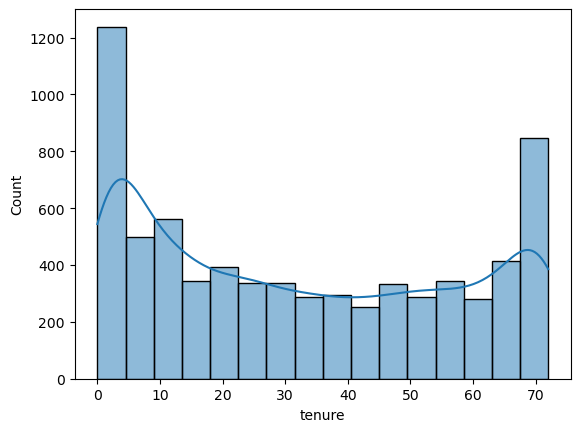

In [12]:
## Deal tunure 0 use interpolation
sns.histplot(data = df, x='tenure', kde=True)
plt.show()

<a id="1.3.1"></a>
### <b>1.3.1 <span style='color:#00008B'>Missing Value</span></b>


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df.dropna(inplace = True)

In [16]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

<a id="1.3.2"></a>
### <b>1.3.2 <span style='color:#00008B'>Duplicated</span></b>


In [17]:
df.duplicated().sum()

22

In [18]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [19]:
df.drop_duplicates(inplace=True)

<a id="1.3.3"></a>
### <b>1.3.3 <span style='color:#00008B'>Outlier</span></b>

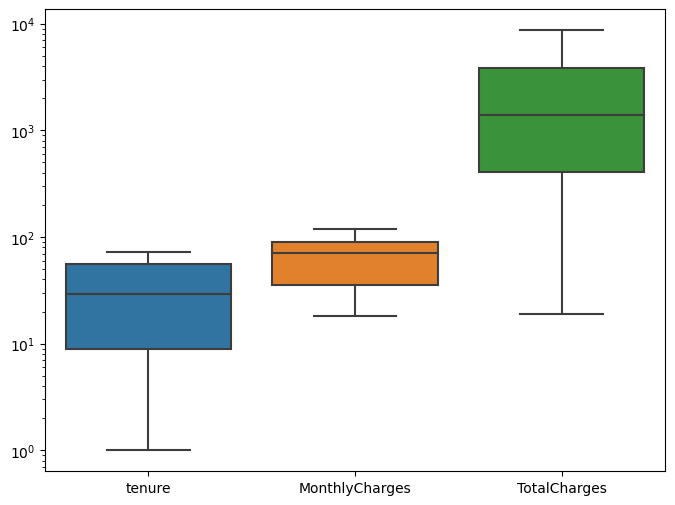

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data =df[numeric_columns])
plt.yscale('log')
plt.show()

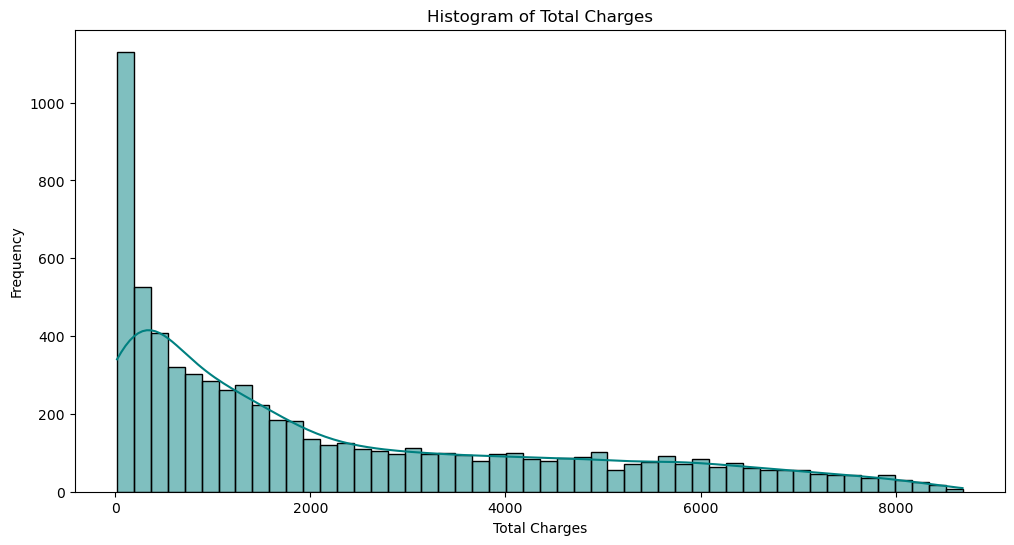

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df['TotalCharges'], bins=50, kde=True, color='teal')

ax.set_xlabel('Total Charges')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Total Charges')

plt.show()


<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span>Exploratory Data Anlysis(EDA) with Data Visualization</div>

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:blue;
            overflow:hidden;
            font-weight:700">Now, let's understand dataset based on:</div>


#### Gender, Senoirity, Parnter and Dependents
#### Services
#### Security_support
#### Contract type
#### Churn analysis based on paying options
#### Charges

<a id="2.1"></a>
# <b>2.1 <span style='color:#00008B'>Gender, Seniority, Partner and Dependends(Customer)</span></b>

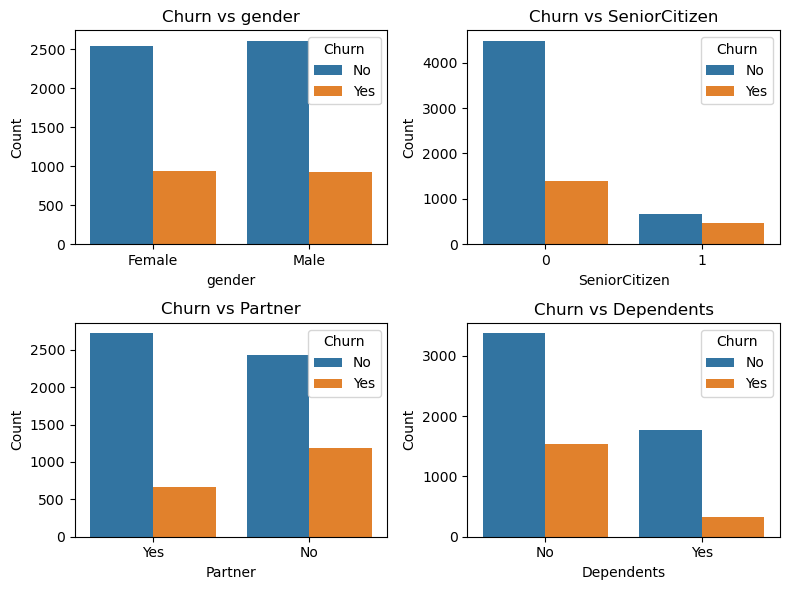

In [22]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6)) # 2x2 grid of plot

for i, ax in enumerate(axes.flat): # enumerate function is used to loop through each subplot in the grid
    if i < len(cols):
        sns.countplot(data=df, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        
plt.tight_layout() # ensuring that each plot is evenly spaced within the figure
plt.show()

- **Gender** has **no influence** on whether the customer will churn or not. 
- **Non-senior** citizens **churn more** than non-senior in **absolute term** but in **relative term senior citizens churn more** often.
- **Customers without partner churn more** often than their counterparts.<br>
and finally, 
- **customers without dependants churn more** than customers with dependents.


<a id="2.2"></a>
# <b>2.2 <span style='color:#00008B'>Services</span></b>


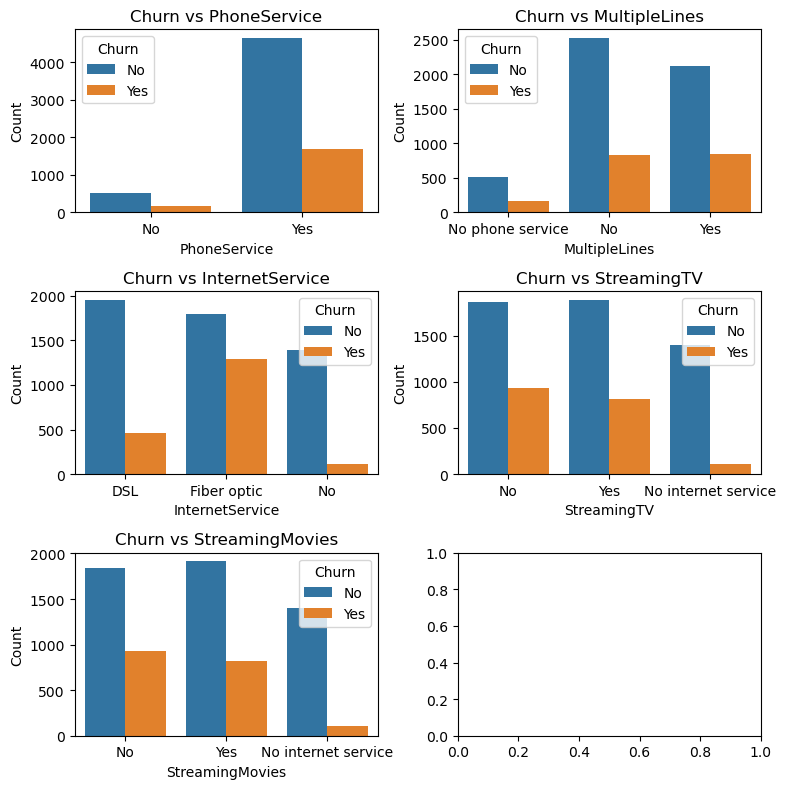

In [23]:
services = df[['Churn', 'PhoneService', 'MultipleLines', 'InternetService','StreamingTV', 'StreamingMovies']]
cols = services.columns[1:]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
        
    if i < len(cols):
        sns.countplot(data=services, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


- Streaming TV, Streaming Movies, Multiple Lines have **no impact** on churn rate.
- Customers who have **fiber optic** tend to **churn** significantly more than ones that have DSL.

Now let's dive deeper into that finding.
We need gender, partner status, dependents status and senior status.

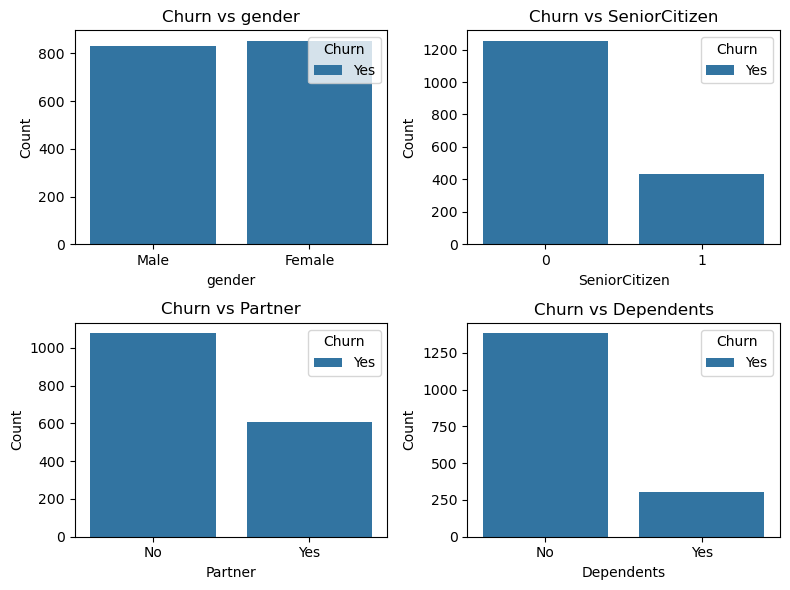

In [24]:
phone_churn = df[(df['PhoneService']=='Yes') & (df['Churn']=='Yes')]

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=phone_churn, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

We can conclude that customers who have churned and use phone service are likely to be **non-seniors, without partners and dependents.** We had got the same conclusion when analyzing the same variables regardless of customers' services.

Now let's investigate the customers who have fiber optic and who have churned.

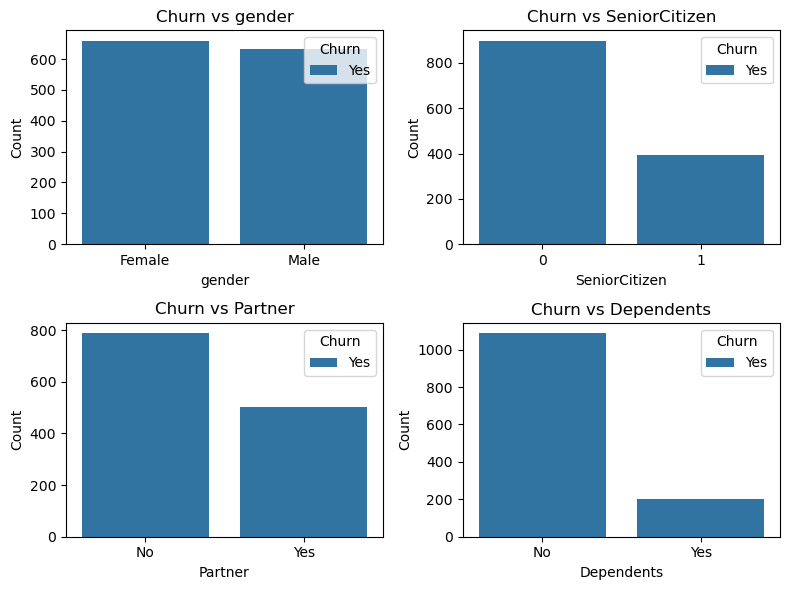

In [25]:
fiber_churn = df[(df['InternetService']=='Fiber optic') & (df['Churn'] == 'Yes')]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for k, ax in enumerate(axes.flat):
    if k < len(cols):
        sns.countplot(data=fiber_churn, x=cols[k], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[k]}')
        ax.set_xlabel(cols[k])
        ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

The same conclusion applies for the customers that have churned and have fiber optic.

<a id="2.3"></a>
# <b>2.3 <span style='color:#00008B'>Security_support</span></b>


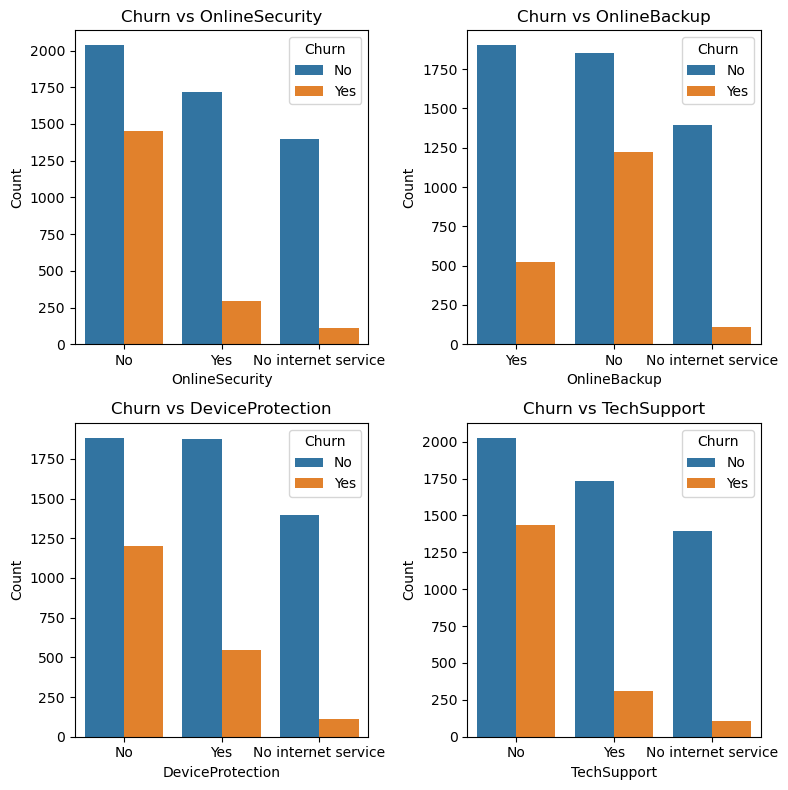

In [26]:
security_support = df[['Churn', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport']]
cols = security_support.columns[1:]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=security_support, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

<a id="2.4"></a>
# <b>2.4 <span style='color:#00008B'>Contract type</span></b>


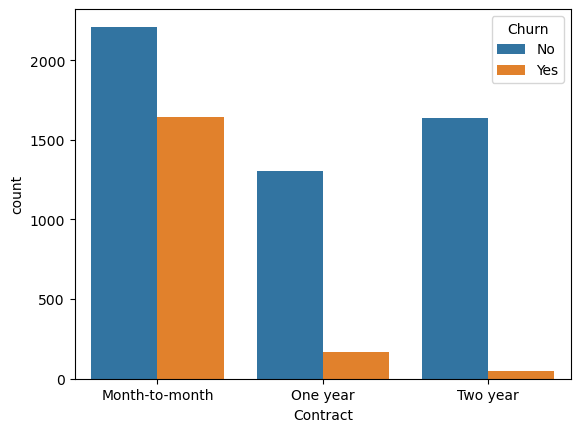

In [27]:
sns.countplot(data=df, x=df['Contract'], hue='Churn')
plt.show()

Customers with **Month-to-month contracts** tend to **churn significantly more** often then customers with one year and two year contracts

<a id="2.5"></a>
# <b>2.5 <span style='color:#00008B'>Churn analysis based on paying options</span></b>
 

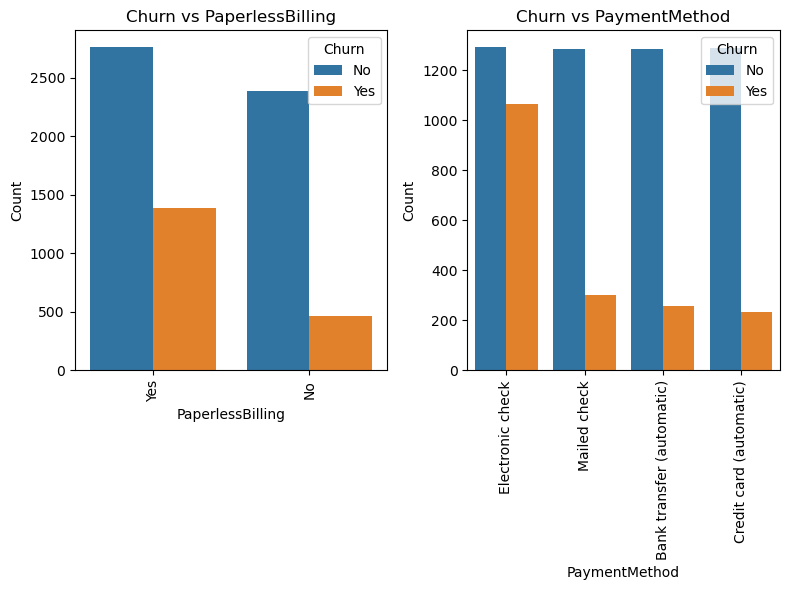

In [28]:
paying_options = df[['Churn', 'PaperlessBilling', 'PaymentMethod']]
cols = paying_options.columns[1:]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,6))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=paying_options, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


<a id="2.6"></a>
# <b>2.6 <span style='color:#00008B'>Churn analysis based on tenure group</span></b>


Customers with **paperless billing and electronic checks** are more likely to **churn** than customers without paperless billing and than the customers with other payment methods.

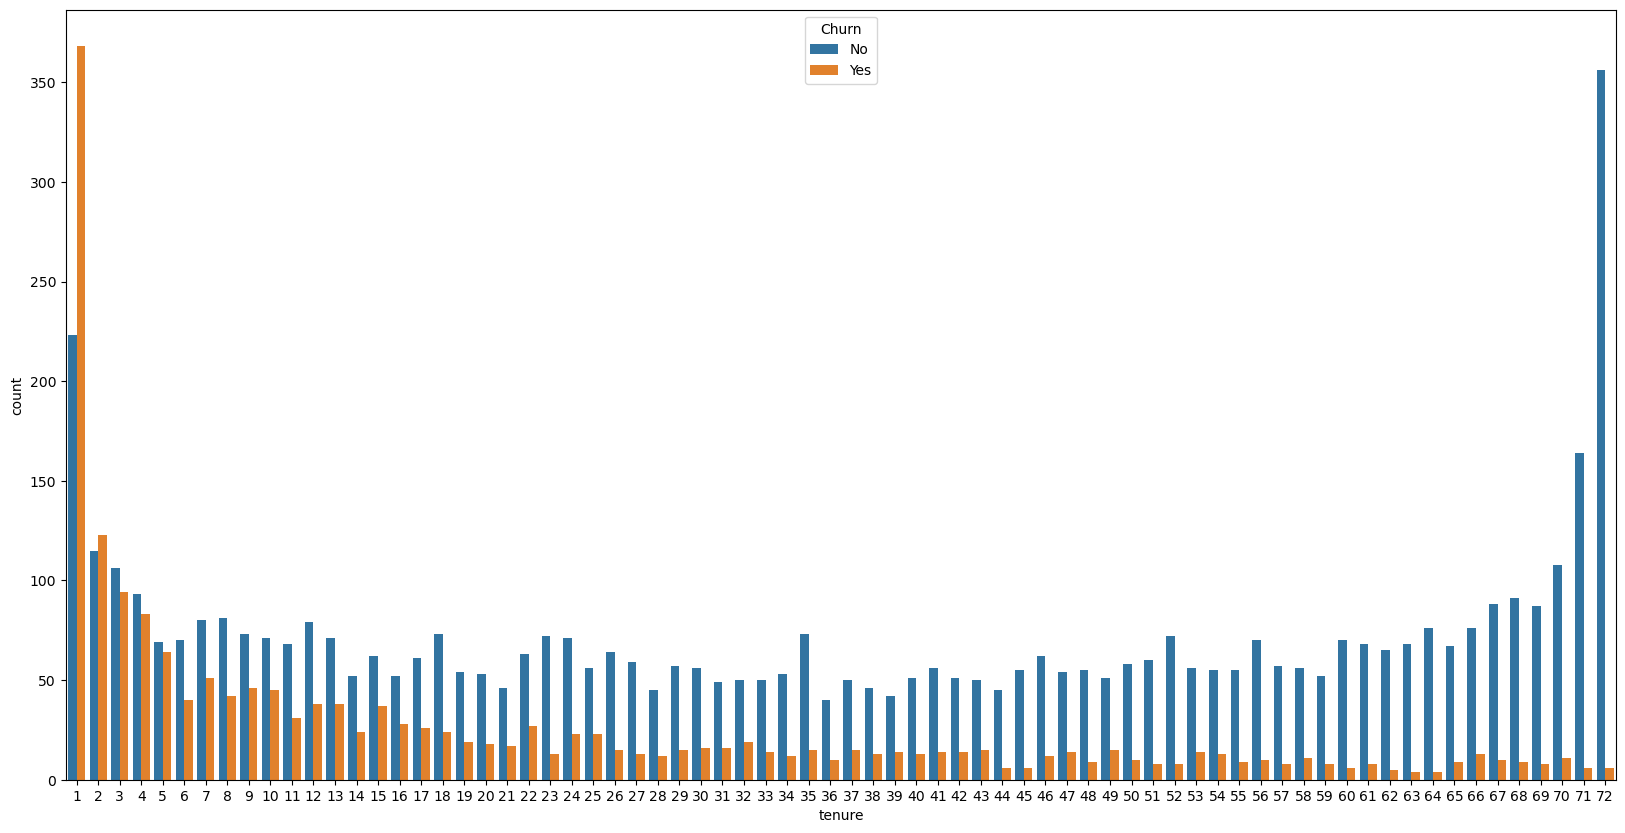

In [29]:
plt.figure(figsize=(20, 10))
sns.countplot(data = df, x = 'tenure', hue = 'Churn')
plt.show()

Customers who **spent less than 1 year** using our services tend to **churn substantially more** than the customers of other tenure groups.

As the **tenure increases**, the **churn rate decreases**

<a id="2.7"></a>
# <b>2.7 <span style='color:#00008B'>Charges</span></b>

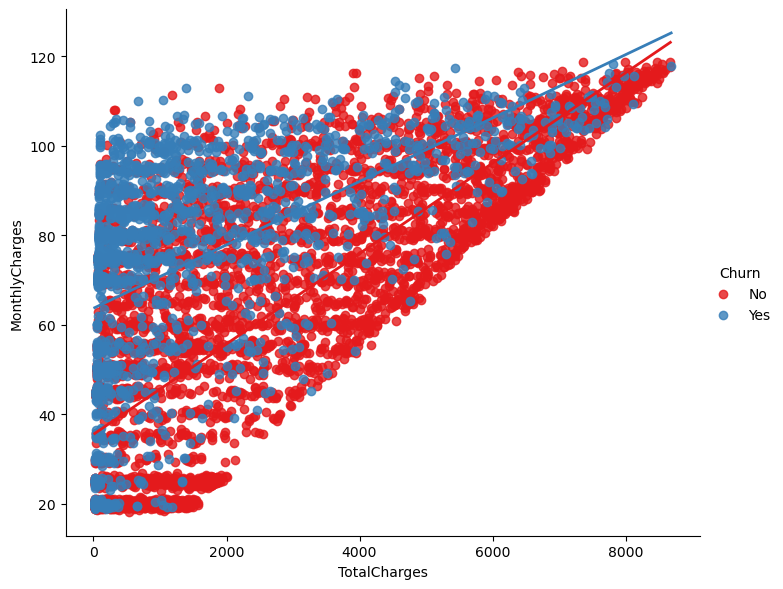

In [30]:
import seaborn as sns

sns.lmplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', ci=None, height=6, aspect=1.2, palette='Set1', line_kws={'linewidth': 2})
sns.despine()
plt.show()


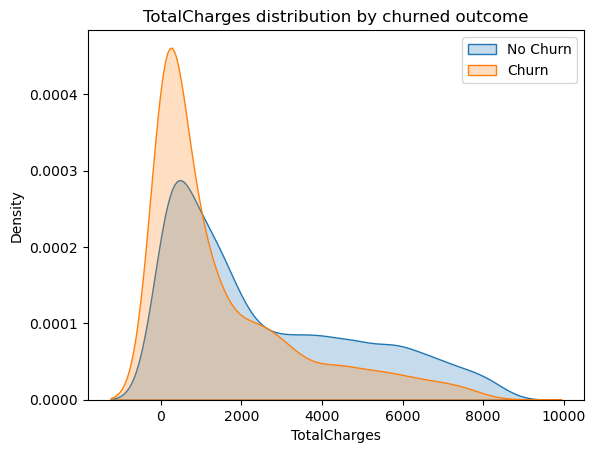

In [31]:
sns.kdeplot(df['TotalCharges'][df['Churn']=='No'], label='Churn - No', shade = True)
sns.kdeplot(df['TotalCharges'][df['Churn']=='Yes'], label='Churn - Yes', shade = True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.xlabel('TotalCharges')
plt.title('TotalCharges distribution by churned outcome')
plt.show()

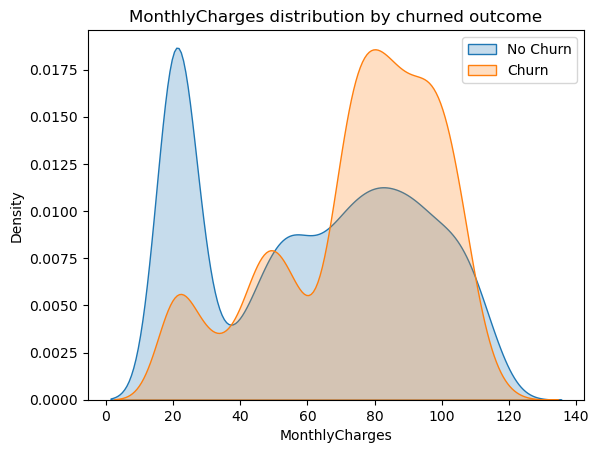

In [32]:
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='No'], label='Churn - No', shade = True)
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='Yes'], label='Churn - Yes', shade = True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.xlabel('MonthlyCharges')
plt.title('MonthlyCharges distribution by churned outcome')
plt.show()

In [33]:
churn_monthly = pd.Series([df[df['Churn'] == 'Yes']['MonthlyCharges'].mean(),
                           df[df['Churn'] == 'No']['MonthlyCharges'].mean()],
                          index=['Churned', 'Non-Churned'])
churn_total = pd.Series([df[df['Churn'] == 'Yes']['TotalCharges'].mean(),
                       df[df['Churn'] == 'No']['TotalCharges'].mean()],
                       index = ['Churned', 'Non-Churned'])
print(churn_monthly)
print(churn_total)

Churned        74.604308
Non-Churned    61.387415
dtype: float64
Churned        1541.376548
Non-Churned    2560.264118
dtype: float64


<!-- <a id="3"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">3 <span style='color:#CDA63A'>|</span>Data Visualization</div>
 -->

1. **High Churn rate** is seen for the customers **without dependants, online security, tech support**. Also customers who use **electronic checks** as a payment method, who use **our services less than 1 year** and who have **month-to-month contracts** are likely to churn frequently. 
Factors that also contribute to the high churn rate (although their impact is  less significant then the aforementioned variables) are:
Non-seniority, no partners, no phone service, no online backup, no device protection and paperless billing.

2. **Low Churn rate** is seen for the customers that **use our services more than 4 years**, that have **one-year / two-years contracts** and for the customers **without internet service, streamingTV and streamingMovies**.


3. Almost **no impact on churn** have the variables such as **gender, streamingTV, streamingMovies and MultipleLines**


<a id="4"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span>Data preprocessing and feature engineering</div>


##### the columns have no internet service or no phone service, that can be replaced with a simple No

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [36]:
df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
categoric_columns = []
yes_no_columns = []
numeric_columns = []

columns = list(df.columns)
    
for i in columns:
    if len(df[i].unique()) > 6:
        numeric_columns.append(i)
    elif len(df[i].unique()) == 2:
        yes_no_columns.append(i)
    else:
        categoric_columns.append(i)

In [38]:
numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [39]:
yes_no_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [40]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [41]:
df['Contract'].value_counts()

Contract
Month-to-month    3853
Two year          1685
One year          1472
Name: count, dtype: int64

In [42]:
# categorize_columns(df)

<a id="4.1"></a>
# <b>4.1 <span style='color:#00008B'>Scaling</span></b>
**feature scaling** is not required for logistic regression


<a id="4.2"></a>
# <b>4.2 <span style='color:#00008B'>Encoding Categorical Variables</span></b>


We will use **One-Hot Encoding** and **Label Encoding**

In [43]:
print('Numeric features:', numeric_columns)
print("---"*10)
print('Yes/No columns:', yes_no_columns)
print("---"*10)
print('Categorical features:', categoric_columns)


Numeric features: ['tenure', 'MonthlyCharges', 'TotalCharges']
------------------------------
Yes/No columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
------------------------------
Categorical features: ['InternetService', 'Contract', 'PaymentMethod']


<a id="4.2.1"></a>
## <b>4.2.1 <span style='color:#00008B'>Label Encoding or two Hot encoding</span></b>

In [44]:
df[categoric_columns]

,InternetService,Contract,PaymentMethod
0,DSL,Month-to-month,Electronic check
1,DSL,One year,Mailed check
2,DSL,Month-to-month,Mailed check
3,DSL,One year,Bank transfer (automatic)
4,Fiber optic,Month-to-month,Electronic check
...,...,...,...
7038,DSL,One year,Mailed check
7039,Fiber optic,One year,Credit card (automatic)
7040,DSL,Month-to-month,Electronic check
7041,Fiber optic,Month-to-month,Mailed check


In [45]:
df = pd.get_dummies(df, columns=categoric_columns)

In [46]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,No,No,Yes,No,No,No,No,Yes,29.85,29.85,No,True,False,False,True,False,False,False,False,True,False
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,No,No,No,No,56.95,1889.50,No,True,False,False,False,True,False,False,False,False,True
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Yes,53.85,108.15,Yes,True,False,False,True,False,False,False,False,False,True
3,Male,0,No,No,45,No,No,Yes,No,Yes,Yes,No,No,No,42.30,1840.75,No,True,False,False,False,True,False,True,False,False,False
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.70,151.65,Yes,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,84.80,1990.50,No,True,False,False,False,True,False,False,False,False,True
7039,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,103.20,7362.90,No,False,True,False,False,True,False,False,True,False,False
7040,Female,0,Yes,Yes,11,No,No,Yes,No,No,No,No,No,Yes,29.60,346.45,No,True,False,False,True,False,False,False,False,True,False
7041,Male,1,Yes,No,4,Yes,Yes,No,No,No,No,No,No,Yes,74.40,306.60,Yes,False,True,False,True,False,False,False,False,False,True


In [47]:
# df
df.replace('No', 0, inplace=True)
df.replace('Yes',1, inplace=True)


In [48]:
df.replace('Male', 0, inplace=True)
df.replace('Female',1, inplace=True)


In [49]:
# le = LabelEncoder()
# for col in yes_no_columns:
#     dataset[col] = le.fit_transform(dataset[col])

In [50]:
df[yes_no_columns]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,1,0,0,0,0,1,1
3,0,0,0,0,0,0,1,0,1,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,1,0,1,1,1,1,1,0
7039,1,0,1,1,1,1,0,1,1,0,1,1,1,0
7040,1,0,1,1,0,0,1,0,0,0,0,0,1,0
7041,0,1,1,0,1,1,0,0,0,0,0,0,1,1


In [51]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,True,False,False,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,False,True,False,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,False,True,False,True,False,False,False,False,False,True


<a id="4.2.2"></a>
## <b>4.2.2 <span style='color:#00008B'>One-Hot Encoding</span></b>


In [52]:
# df = pd.get_dummies(df, columns=categoric_columns)

In [53]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,True,False,False,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,False,True,False,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,False,True,False,True,False,False,False,False,False,True


In [54]:
df[numeric_columns]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [55]:
df[numeric_columns].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.244194,0.825293
MonthlyCharges,0.244194,1.000000,0.650540
TotalCharges,0.825293,0.650540,1.000000


In [56]:
# #Correlation between all columns and Churn
# plt.figure(figsize=(16,5))
# df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [57]:
10000/1000

10.0

In [58]:
churn_counts = df['Churn'].value_counts()
churn_ratio = churn_counts[0] / churn_counts[1]

In [59]:
print("The ratio between retained customers and churners is",churn_ratio)

The ratio between retained customers and churners is 2.774905761981691


In [60]:
df['Churn'].value_counts()

Churn
0    5153
1    1857
Name: count, dtype: int64

<a id="4.2.2"></a>
## <b>4.2.2 <span style='color:#00008B'>Multicollinearity</span></b>

### Detecting Multicollinearity

A statistical technique called the **variance inflation factor (VIF)** can detect and measure the amount of collinearity in a multiple regression model.
- A VIF of 1 will mean that the variables are not correlated.
- A VIF between 1 and 5 shows that variables are moderately correlated.
- A VIF between 5 and 10 will mean that variables are highly correlated.


[More about Multicollinearity](https://www.investopedia.com/terms/m/multicollinearity.asp#:~:text=Multicollinearity%20is%20a%20statistical%20concept,in%20less%20reliable%20statistical%20inferences.)

In [61]:
def VIF(x):
    vif = pd.DataFrame({
        'Features': x.columns,
        'VIF': [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    })
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif

In [62]:
numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [63]:
VIF(df[numeric_columns])

,Features,VIF
0,TotalCharges,8.09
1,tenure,6.33
2,MonthlyCharges,3.37


In [64]:
df1 = df.drop(columns = 'TotalCharges')

In [65]:
VIF(df1[['tenure', 'MonthlyCharges']])

,Features,VIF
0,tenure,2.62
1,MonthlyCharges,2.62


In [66]:
# sns.scatterplot(x = df1['tenure'], y =df1['MonthlyCharges'])
# plt.show()

In [67]:
dataset =df1.copy()

<a id="5"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span>Data Splitting and Model Building</div>

<a id="5.1"></a>
# <b>4.1 <span style='color:#00008B'>Data Splitting Or Cross Validation</span></b>


**splitting** our dataset into training and testing sets to avoid bias in your model.<br>
**Overfitting**

In [99]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,True,False,False,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,False,True,False,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,False,True,False,True,False,False,False,False,False,True


In [68]:
X = dataset.drop(columns='Churn')
y = dataset['Churn']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

<a id="5.2"></a>
# <b>5.2 <span style='color:#00008B'>Model Buiding and Model Evaluation</span></b>

**LogisticRegression**
<img src="Photos/Logistics.png" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">
<img src="Photos/Sigmoid_function.png" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">

In [70]:
Logistic = LogisticRegression()

In [71]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7010, dtype: int64

In [72]:
Logistic.fit(x_train, y_train)

LogisticRegression()

In [100]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3719,0,0,0,0,28,1,0,0,0,0,0,0,0,0,18.25,False,False,True,False,True,False,False,True,False,False
2645,1,0,0,0,1,1,0,0,0,0,0,0,0,0,19.80,False,False,True,True,False,False,False,True,False,False
2945,0,0,0,0,9,1,0,1,0,0,0,0,0,0,75.60,False,True,False,True,False,False,False,False,True,False
2706,0,0,1,0,2,1,0,0,0,1,0,0,0,0,76.40,False,True,False,True,False,False,False,False,True,False
1902,0,0,1,1,72,1,1,1,1,1,1,1,1,1,90.60,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,0,0,1,1,68,1,1,1,1,1,1,1,1,1,113.15,False,True,False,False,False,True,False,False,True,False
3026,1,0,1,0,16,1,1,0,0,0,0,1,0,1,84.95,False,True,False,True,False,False,False,False,True,False
5937,1,1,1,0,8,1,1,0,0,0,0,0,1,1,84.00,False,True,False,True,False,False,False,False,True,False
2435,1,0,0,1,14,1,0,0,0,1,0,1,0,1,59.80,True,False,False,True,False,False,False,True,False,False


In [73]:
y_pred =  Logistic.predict(x_test)

In [101]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [74]:
y_test

3719    0
2645    0
2945    0
2706    1
1902    0
       ..
5581    1
3026    1
5937    1
2435    0
3031    1
Name: Churn, Length: 1402, dtype: int64

In [75]:
confusion_matrix(y_test, y_pred)

array([[922, 108],
       [161, 211]], dtype=int64)

In [76]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    error = 1-accuracy
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    result={"Accuracy":accuracy,"Error":error, "Precision":precision,"Recall":recall,'Specificity':specificity}
    return result

<img src="Photos/confusion_matrix.webp" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">

In [102]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7010, dtype: int64

In [111]:
churn_yes.shape

(1857, 27)

In [116]:
churn_yes

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,False,True,False,True,False,False,False,False,True,False
5,1,0,0,0,8,1,1,0,0,1,0,1,1,1,99.65,820.50,1,False,True,False,True,False,False,False,False,True,False
8,1,0,1,0,28,1,1,0,0,1,1,1,1,1,104.80,3046.05,1,False,True,False,True,False,False,False,False,True,False
13,0,0,0,0,49,1,1,0,1,1,0,1,1,1,103.70,5036.30,1,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,12,1,0,0,0,0,1,1,0,1,59.80,727.80,1,True,False,False,False,True,False,False,False,True,False
7026,1,0,0,0,9,1,0,0,0,0,0,0,0,1,44.20,403.35,1,True,False,False,True,False,False,True,False,False,False
7032,0,1,0,0,1,1,1,0,0,0,0,0,0,1,75.75,75.75,1,False,True,False,True,False,False,False,False,True,False
7034,1,0,0,0,67,1,1,1,1,1,0,1,0,1,102.95,6886.25,1,False,True,False,True,False,False,False,True,False,False


In [109]:
churn_no = df[df['Churn']==0]

In [113]:
churn_no = churn_no.sample(n = 2000 )

In [114]:
churn_no

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
843,1,0,0,0,13,0,0,1,0,0,0,0,0,1,30.85,394.10,0,True,False,False,True,False,False,True,False,False,False
2042,1,1,0,0,28,1,1,0,1,1,1,0,0,0,64.45,1867.60,0,True,False,False,True,False,False,True,False,False,False
4456,1,0,1,0,68,1,1,0,0,0,0,0,0,1,24.95,1614.90,0,False,False,True,False,False,True,False,True,False,False
4988,1,0,1,0,26,1,0,0,0,0,0,0,0,0,19.20,459.60,0,False,False,True,False,True,False,False,False,False,True
3170,0,0,0,0,28,1,1,0,1,0,0,1,1,0,100.20,2688.45,0,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,0,0,1,1,34,1,1,0,0,1,0,1,1,0,77.20,2753.80,0,True,False,False,False,True,False,True,False,False,False
468,1,0,0,1,44,1,0,0,0,0,0,0,0,0,19.90,868.10,0,False,False,True,False,False,True,False,False,False,True
6887,1,0,1,1,35,1,1,0,0,0,0,0,0,0,24.30,821.60,0,False,False,True,False,False,True,True,False,False,False
4679,1,0,1,0,72,1,1,1,1,0,1,1,1,1,86.40,6058.95,0,True,False,False,False,False,True,True,False,False,False


In [119]:
df1 = pd.concat([churn_no, churn_yes])

In [120]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
843,1,0,0,0,13,0,0,1,0,0,0,0,0,1,30.85,394.10,0,True,False,False,True,False,False,True,False,False,False
2042,1,1,0,0,28,1,1,0,1,1,1,0,0,0,64.45,1867.60,0,True,False,False,True,False,False,True,False,False,False
4456,1,0,1,0,68,1,1,0,0,0,0,0,0,1,24.95,1614.90,0,False,False,True,False,False,True,False,True,False,False
4988,1,0,1,0,26,1,0,0,0,0,0,0,0,0,19.20,459.60,0,False,False,True,False,True,False,False,False,False,True
3170,0,0,0,0,28,1,1,0,1,0,0,1,1,0,100.20,2688.45,0,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,12,1,0,0,0,0,1,1,0,1,59.80,727.80,1,True,False,False,False,True,False,False,False,True,False
7026,1,0,0,0,9,1,0,0,0,0,0,0,0,1,44.20,403.35,1,True,False,False,True,False,False,True,False,False,False
7032,0,1,0,0,1,1,1,0,0,0,0,0,0,1,75.75,75.75,1,False,True,False,True,False,False,False,False,True,False
7034,1,0,0,0,67,1,1,1,1,1,0,1,0,1,102.95,6886.25,1,False,True,False,True,False,False,False,True,False,False


In [123]:
X_1 = df1.drop(columns=['Churn'])

In [127]:
Y_1 = df1.Churn

In [128]:
Y_1

843     0
2042    0
4456    0
4988    0
3170    0
       ..
7021    1
7026    1
7032    1
7034    1
7041    1
Name: Churn, Length: 3857, dtype: int64

In [124]:
X_1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
843,1,0,0,0,13,0,0,1,0,0,0,0,0,1,30.85,394.10,True,False,False,True,False,False,True,False,False,False
2042,1,1,0,0,28,1,1,0,1,1,1,0,0,0,64.45,1867.60,True,False,False,True,False,False,True,False,False,False
4456,1,0,1,0,68,1,1,0,0,0,0,0,0,1,24.95,1614.90,False,False,True,False,False,True,False,True,False,False
4988,1,0,1,0,26,1,0,0,0,0,0,0,0,0,19.20,459.60,False,False,True,False,True,False,False,False,False,True
3170,0,0,0,0,28,1,1,0,1,0,0,1,1,0,100.20,2688.45,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,12,1,0,0,0,0,1,1,0,1,59.80,727.80,True,False,False,False,True,False,False,False,True,False
7026,1,0,0,0,9,1,0,0,0,0,0,0,0,1,44.20,403.35,True,False,False,True,False,False,True,False,False,False
7032,0,1,0,0,1,1,1,0,0,0,0,0,0,1,75.75,75.75,False,True,False,True,False,False,False,False,True,False
7034,1,0,0,0,67,1,1,1,1,1,0,1,0,1,102.95,6886.25,False,True,False,True,False,False,False,True,False,False


In [108]:
churn_yes = df[df['Churn']==1]

In [77]:
model_eval(y_test, y_pred)

{'Accuracy': 0.8081312410841655,
 'Error': 0.19186875891583455,
 'Precision': 0.6614420062695925,
 'Recall': 0.5672043010752689,
 'Specificity': 0.8951456310679612}

In [78]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1251,1,0,0,0,1,1,0,0,1,0,0,0,0,0,75.80,False,True,False,True,False,False,False,False,True,False
676,1,0,0,0,48,1,1,0,0,0,0,0,0,0,24.55,False,False,True,False,True,False,True,False,False,False
381,0,0,0,0,1,1,0,0,1,0,0,0,0,0,50.65,True,False,False,True,False,False,False,False,False,True
2313,0,0,1,1,43,1,1,0,0,1,1,1,1,1,104.30,False,True,False,False,True,False,False,True,False,False
6901,1,0,0,0,30,1,1,0,1,1,0,1,0,1,68.95,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,1,0,1,0,4,1,1,0,1,0,0,1,0,1,91.65,False,True,False,True,False,False,False,False,True,False
3276,1,0,0,0,4,1,0,0,0,0,0,0,1,1,79.15,False,True,False,True,False,False,False,False,True,False
1661,1,1,1,0,65,1,1,0,1,1,0,1,1,1,108.80,False,True,False,True,False,False,True,False,False,False
2617,1,0,0,0,1,1,0,0,0,0,0,0,0,1,19.60,False,False,True,True,False,False,False,False,False,True


<a id="5.2.1"></a>
## <b>5.2.1 <span style='color:#00008B'>Feature selection</span></b>


<a id="5.2.1.1"></a>
### <b>5.2.1.1 <span style='color:#00008B'>Recursive Feature Elimination (RFE)</span></b>

[More about RFE](https://www.analyticsvidhya.com/blog/2023/05/recursive-feature-elimination/#:~:text=Recursive%20Feature%20Elimination%20is%20a,number%20of%20features%20is%20obtained.)
```python
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Initialize RFE with desired number of features
n_features = 10
rfe = RFE(estimator=model, n_features_to_select=n_features)

# Fit RFE on the training data
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Get selected feature indices
selected_feature_indices = rfe.support_
selected_features = X.columns[selected_feature_indices]

```


## Model building using RFE
---
**Recursive Feature Elimination** algorithm works in the following steps:
1. Rank the importance of all features using the chosen RFE machine learning algorithm.
2. Eliminate the least important feature.
3. Build a model using the remaining features.

In [79]:
n = int(input('Input the number of features you want to predict: '))

rfe = RFE(Logistic, n_features_to_select= n)
rfe.fit(x_train, y_train)

Input the number of features you want to predict: 14


RFE(estimator=LogisticRegression(), n_features_to_select=14)

In [80]:
x_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [81]:
rfe.support_

array([False, False, False,  True, False,  True, False,  True,  True,
       False,  True, False,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True,  True, False])

In [82]:

selected_features = x_train[x_train.columns[rfe.support_]]

In [83]:
selected_features

,Dependents,PhoneService,OnlineSecurity,OnlineBackup,TechSupport,StreamingMovies,PaperlessBilling,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
1251,0,1,0,1,0,0,0,True,False,True,False,False,False,True
676,0,1,0,0,0,0,0,False,True,False,False,True,False,False
381,0,1,0,1,0,0,0,False,False,True,False,False,False,False
2313,1,1,0,0,1,1,1,True,False,False,False,False,True,False
6901,0,1,0,1,0,0,1,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,0,1,0,1,0,0,1,True,False,True,False,False,False,True
3276,0,1,0,0,0,1,1,True,False,True,False,False,False,True
1661,0,1,0,1,0,1,1,True,False,True,False,True,False,False
2617,0,1,0,0,0,0,1,False,True,True,False,False,False,False


In [84]:
# selected_features

In [85]:
Logistic1 = LogisticRegression()

In [86]:
# 

In [87]:
# x_train = x_train[selected_features]

In [88]:
Logistic1.fit(selected_features, y_train)

LogisticRegression()

In [89]:
selected_features.columns

Index(['Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'StreamingMovies', 'PaperlessBilling',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [90]:
x_test[selected_features.columns]

,Dependents,PhoneService,OnlineSecurity,OnlineBackup,TechSupport,StreamingMovies,PaperlessBilling,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
3719,0,1,0,0,0,0,0,False,True,False,False,False,True,False
2645,0,1,0,0,0,0,0,False,True,True,False,False,True,False
2945,0,1,1,0,0,0,0,True,False,True,False,False,False,True
2706,0,1,0,0,0,0,0,True,False,True,False,False,False,True
1902,1,1,1,1,1,1,1,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,1,1,1,1,1,1,1,True,False,False,True,False,False,True
3026,0,1,0,0,0,0,1,True,False,True,False,False,False,True
5937,0,1,0,0,0,1,1,True,False,True,False,False,False,True
2435,1,1,0,0,0,0,1,False,False,True,False,False,True,False


In [91]:
y_pred1 = Logistic1.predict(x_test[selected_features.columns])

In [92]:
model_eval(y_test, y_pred1)

{'Accuracy': 0.7796005706134094,
 'Error': 0.22039942938659063,
 'Precision': 0.5929203539823009,
 'Recall': 0.5403225806451613,
 'Specificity': 0.8660194174757282}

In [93]:
Logistic1.coef_

array([[-0.24336407, -0.33686735, -0.54980014, -0.40384051, -0.34849391,
         0.18500778,  0.32713214,  0.84625334, -0.88218268,  1.3380542 ,
        -1.10243248, -0.23229885, -0.29999559,  0.27614749]])

In [94]:
selected_features.isnull().sum()

Dependents                                 0
PhoneService                               0
OnlineSecurity                             0
OnlineBackup                               0
TechSupport                                0
StreamingMovies                            0
PaperlessBilling                           0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
dtype: int64

In [95]:
y_train.isnull().sum()

0

In [96]:
selected_features = selected_features.astype(int)

In [97]:
y_train

1251    1
676     0
381     1
2313    0
6901    0
       ..
4950    1
3276    1
1661    0
2617    1
2743    0
Name: Churn, Length: 5608, dtype: int64

In [98]:
a'1"+1

SyntaxError: unterminated string literal (detected at line 1) (3720477130.py, line 1)

In [ ]:
Logistic1.coef_

In [ ]:
selected_features

In [ ]:
coefficients1 = Logistic1.coef_


In [ ]:
coefficients1 = coefficients1[0].tolist()

In [ ]:
 feature_names=selected_features.columns.tolist()

In [ ]:
final_featureimportance = pd.DataFrame({'Coefficient':coefficients1,
                          'feature_names1':feature_names1})

In [ ]:
final_featureimportance.sort_values(by = 'Coefficient', ascending=False)

In [ ]:
Logistic1.intercept_

In [ ]:
feature_names1

In [ ]:
from explainerdashboard import ClassifierExplainer , ExplainerDashboard



In [ ]:
explainer = ClassifierExplainer(Logistic1, selected_features, y_train)
ExplainerDashboard(explainer, port=433).run()